##  Oasis Infobyte DataScience Internship
##  Task 4
##  EMAIL SPAM DETECTION

In [1]:
#Import librairies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#Data cleaning 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#Drop unnamed 1,2,3 

In [9]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1' : 'target','v2':'text'}, inplace = True)

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.dtypes

target    object
text      object
dtype: object

In [14]:
df = df.astype({'target':'category','text':'category'})

In [15]:
df.dtypes

target    category
text      category
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
df.duplicated().sum()

403

In [21]:
df = df.drop_duplicates(keep ='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

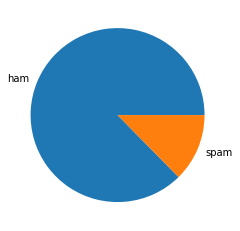

In [24]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'])
plt.show()

In [25]:
spam_count = (df['target'] == 1).sum()
ham_count = (df['target'] == 0).sum()

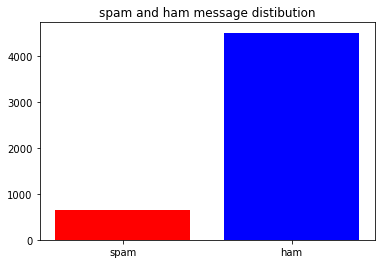

In [26]:
fig, ax = plt.subplots()
ax.bar(['spam','ham'],[spam_count , ham_count], color =['red', 'blue'])
ax.set_title('spam and ham message distibution')
plt.show()

In [27]:
#Testing and training data

In [28]:
from  sklearn.model_selection import train_test_split

In [29]:
y = df.target

In [30]:
X = df.text

In [31]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state= 40,test_size = 0.25)

In [32]:
#Create a countervectorizer object and fit it to the training data

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(train_X)

CountVectorizer()

In [34]:
#Transforming the training and testing data into ,atrices of word counts 

In [35]:
X_train_counts = cv.transform(train_X)
X_val_counts = cv.transform(val_X)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error

In [45]:
df_model = LogisticRegression()
df_model.fit( X_train_counts, train_y)

LogisticRegression()

In [46]:
pred_val = df_model.predict(X_val_counts)

In [52]:
mae = mean_absolute_error(val_y,pred_val)
accuracy = accuracy_score(val_y,pred_val)
precision = precision_score(val_y,pred_val)
recall = recall_score(val_y,pred_val)

In [54]:
print("Mean absolute error: ", mae)
print("Accuracy: ", accuracy)
print("Precision: ",precision)
print("Recall", recall)

Mean absolute error:  0.020108275328692964
Accuracy:  0.979891724671307
Precision:  0.968503937007874
Recall 0.8482758620689655


In [ ]:
ac